## Corona Virus Updates - India – Using Python

Let’s see a simple Python script to demonstrate the state-wise corona virus cases in India. This Python script fetches the live data from Ministry of Health and Family Welfare Official Website(MoHFW). Then data is represented in the horizontal bar graph.

In [4]:
import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Fetch data from website

extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'
  
SHORT_HEADERS = ['SNo', 'State','Confirmed', 
                 'Cured','Death'] 
  
response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 
  
stats = [] 
all_rows = soup.find_all('tr') 
  
for row in all_rows: 
    stat = extract_contents(row.find_all('td')) 
    if stat: 
        if len(stat) == 5: 
            # last row 
            stat = ['', *stat] 
            stats.append(stat) 
        elif len(stat) == 6: 
            stats.append(stat) 

stats[-1][1] = "Total Cases"
  
stats.remove(stats[-1]) 

In [6]:
objects = [] 
for row in stats : 
    objects.append(row[1])  


y_pos = np.arange(len(objects)) 
  
performance = [] 
for row in stats : 
    performance.append((row[2]) + (row[3])) 
    
table = tabulate(stats, headers=SHORT_HEADERS) 
print(table)

      SNo  State                          Confirmed    Cured    Death
--  -----  ---------------------------  -----------  -------  -------
        1  Andhra Pradesh                       432       11        7
        2  Andaman and Nicobar Islands           11       10        0
        3  Arunachal Pradesh                      1        0        0
        4  Assam                                 31        0        1
        5  Bihar                                 65       26        1
        6  Chandigarh                            21        7        0
        7  Chhattisgarh                          31       10        0
        8  Delhi                               1510       30       28
        9  Goa                                    7        5        0
       10  Gujarat                              539       54       26
       11  Haryana                              185       29        3
       12  Himachal Pradesh                      32       13        1
       13  Jammu and

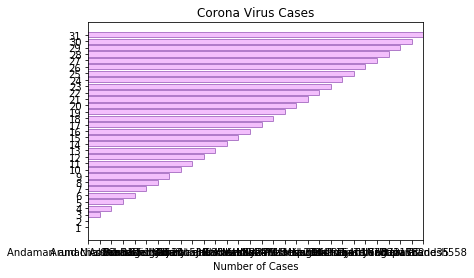

In [7]:
plt.barh(y_pos, performance, align='center', alpha=0.5, 
                 color=(234/256.0, 128/256.0, 252/256.0), 
                 edgecolor=(106/256.0, 27/256.0, 154/256.0)) 
  
plt.yticks(y_pos,objects)
plt.xlim(1,30) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show()